<h1>Exploratory Analysis Notebook</h1>
<p>Purpose: This notebook will be used to explore the dataset, understand all of the feature present, and see how they correlate with eachother</p>
<hr>

<h2>Packages</h2>

In [60]:
# Packages

from nhldata import moneypuck
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None) 

In [61]:
# Establish connection to NHL Shots Data
mp_conn = moneypuck.Connector()

shots = mp_conn.shots_season(
    season = 2024
)

shots_df = pd.DataFrame(shots)

<h2>Examine Dataset<h2>
<hr>

In [62]:
shots_df.shape

(119387, 137)

In [63]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119387 entries, 0 to 119386
Columns: 137 entries, shotID to yCordAdjusted
dtypes: object(137)
memory usage: 124.8+ MB


In [64]:
shots_df.head()

,shotID,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedXCordABS,arenaAdjustedYCord,arenaAdjustedYCordAbs,averageRestDifference,awayEmptyNet,awayPenalty1Length,awayPenalty1TimeLeft,awaySkatersOnIce,awayTeamCode,awayTeamGoals,defendingTeamAverageTimeOnIce,defendingTeamAverageTimeOnIceOfDefencemen,defendingTeamAverageTimeOnIceOfDefencemenSinceFaceoff,defendingTeamAverageTimeOnIceOfForwards,defendingTeamAverageTimeOnIceOfForwardsSinceFaceoff,defendingTeamAverageTimeOnIceSinceFaceoff,defendingTeamDefencemenOnIce,defendingTeamForwardsOnIce,defendingTeamMaxTimeOnIce,defendingTeamMaxTimeOnIceOfDefencemen,defendingTeamMaxTimeOnIceOfDefencemenSinceFaceoff,defendingTeamMaxTimeOnIceOfForwards,defendingTeamMaxTimeOnIceOfForwardsSinceFaceoff,defendingTeamMaxTimeOnIceSinceFaceoff,defendingTeamMinTimeOnIce,defendingTeamMinTimeOnIceOfDefencemen,defendingTeamMinTimeOnIceOfDefencemenSinceFaceoff,defendingTeamMinTimeOnIceOfForwards,defendingTeamMinTimeOnIceOfForwardsSinceFaceoff,defendingTeamMinTimeOnIceSinceFaceoff,distanceFromLastEvent,event,gameOver,game_id,goal,goalieIdForShot,goalieNameForShot,homeEmptyNet,homePenalty1Length,homePenalty1TimeLeft,homeSkatersOnIce,homeTeamCode,homeTeamGoals,homeTeamScore,homeTeamWon,homeWinProbability,id,isHomeTeam,isPlayoffGame,lastEventCategory,lastEventShotAngle,lastEventShotDistance,lastEventTeam,lastEventxCord,lastEventxCord_adjusted,lastEventyCord,lastEventyCord_adjusted,location,offWing,penaltyLength,period,playerNumThatDidEvent,playerNumThatDidLastEvent,playerPositionThatDidEvent,playoffGame,roadTeamCode,roadTeamScore,season,shooterLeftRight,shooterName,shooterPlayerId,shooterTimeOnIce,shooterTimeOnIceSinceFaceoff,shootingTeamAverageTimeOnIce,shootingTeamAverageTimeOnIceOfDefencemen,shootingTeamAverageTimeOnIceOfDefencemenSinceFaceoff,shootingTeamAverageTimeOnIceOfForwards,shootingTeamAverageTimeOnIceOfForwardsSinceFaceoff,shootingTeamAverageTimeOnIceSinceFaceoff,shootingTeamDefencemenOnIce,shootingTeamForwardsOnIce,shootingTeamMaxTimeOnIce,shootingTeamMaxTimeOnIceOfDefencemen,shootingTeamMaxTimeOnIceOfDefencemenSinceFaceoff,shootingTeamMaxTimeOnIceOfForwards,shootingTeamMaxTimeOnIceOfForwardsSinceFaceoff,shootingTeamMaxTimeOnIceSinceFaceoff,shootingTeamMinTimeOnIce,shootingTeamMinTimeOnIceOfDefencemen,shootingTeamMinTimeOnIceOfDefencemenSinceFaceoff,shootingTeamMinTimeOnIceOfForwards,shootingTeamMinTimeOnIceOfForwardsSinceFaceoff,shootingTeamMinTimeOnIceSinceFaceoff,shotAngle,shotAngleAdjusted,shotAnglePlusRebound,shotAnglePlusReboundSpeed,shotAngleReboundRoyalRoad,shotDistance,shotGeneratedRebound,shotGoalProbability,shotGoalieFroze,shotOnEmptyNet,shotPlayContinued,shotPlayContinuedInZone,shotPlayContinuedOutsideZone,shotPlayStopped,shotRebound,shotRush,shotType,shotWasOnGoal,speedFromLastEvent,team,teamCode,time,timeBetweenEvents,timeDifferenceSinceChange,timeLeft,timeSinceFaceoff,timeSinceLastEvent,timeUntilNextEvent,wentToOT,wentToShootout,xCord,xCordAdjusted,xFroze,xGoal,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xRebound,xShotWasOnGoal,yCord,yCordAdjusted
0,0,52.0,57.0,57.0,-41.0,41.0,0.0,0,0,0,5,NJD,0,8.0,8.0,8.0,8.0,8.0,8.0,2,3,8,8,8,8,8,8,8,8,8,8,8,8,12.0,SHOT,,20001,0,8480045,Ukko-Pekka Luukkonen,0,0,0,5,BUF,0,,0,,7,0.0,0,HIT,0.0,0.0,HOME,69,69,-40,-40,HOMEZONE,0,,1,17,0,D,,,,2024,,Simon Nemec,8483495,8,8,8.0,8.0,8.0,8.0,8.0,8.0,2,3,8,8,8,8,8,8,8,8,8,8,8,8,-51.3401917459,51.3401917459,0.0,0.0,0,51.2249938995,0,,0,0,,0,1,0,0,0,WRIST,1.0,4.0,AWAY,NJD,8,,0,,8,3,11,,,57,57,0.238455,0.0125372,0.394229,0.301072,0.0228073,0.0309002,0.710867,-40,-40
1,1,33.0,71.0,71.0,-28.0,28.0,-6.0,0,0,0,5,NJD,0,16.0,18.5,18.5,14.3333333333,14.3333333333,16.0,2,3,29,29,29,29,29,29,6,8,8,6,6,6,148.677503342,MISS,,20001,0,8480045,Ukko-Pekka Luukkonen,0,0,0,5,BUF,0,,0,,9,0.0,0,GIVE,0.0,0.0,AWAY,-73,-73,9,9,HOMEZONE,1,,1,63,0,L,,,,2024,L,Jesper Bratt,8479407,7,7,10.0,14.5,14.5,7.0,7.0,10.0,2,3,29,29,29,8,8,29,0,0,0,6,6,0,-57.2647737279,57.2647737279,0.0,0.0,0,33.2866339542,0,,0,0,,0,1,0,0,0

Given the large nature of this dataset (on a feature basis), `df.info()` has truncated the output. We can still see, however, that there are 137 columns, all of type `object`. After we select features, we'll be sure to change numeric values to their appropriate dtypes. We will check for missing data in the next cell.

In [65]:
shots_df = shots_df.replace('', np.nan)

print('Checking for missing data: ')
print('=' * 50)

null_counts = shots_df.isnull().sum().sort_values(ascending=False)
null_counts = null_counts[null_counts > 0]
null_counts

C:\Users\Lakshay Verma\AppData\Local\Temp\ipykernel_34600\1319120405.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shots_df = shots_df.replace('', np.nan)


Checking for missing data: 


wentToShootout                119387
shotGoalProbability           119387
homeTeamScore                 119387
homeWinProbability            119387
penaltyLength                 119387
roadTeamCode                  119387
playoffGame                   119387
roadTeamScore                 119387
gameOver                      119387
timeBetweenEvents             119387
timeLeft                      119387
shotPlayContinued             119387
wentToOT                      119387
shooterLeftRight                3750
shotType                        1097
goalieNameForShot                966
playerPositionThatDidEvent       507
shooterName                       12
dtype: int64

All instances of null values were displayed above. It's clear that there are certain columns here that have no values in any row (i.e. all values are null for the given field). 

We will go ahead and make note of these columns, to remove them from our analyses. More importantly, there are 5 features that have some null values (ex: `shooterLeftRight`). For these instances, we could try to impute the value, but given that they represent a small amount of the overall dataset, we will remove them entirely.

<h2>Feature Selection</h2>
<hr>

<p>Now that we know where there are null values, let's spend some time looking through the features we have available.</p>
<p>The complete list of features can be found <a href='https://docs.google.com/spreadsheets/d/1aB-AkJJMTEPhb4oBCyOv-kJr11sOXW5MQtMjBeNss-Y/edit?gid=241218541#gid=241218541'>here.</a>

In [66]:
'''
Selection of the features below were based on the descriptions in the above linked data dictionary.
These were chosen as the first set of features to use. Transformations (where necessary) will be applied at 
a later step.
'''

target_cols = [
    'homeTeamCode', 'awayTeamCode', 'isPlayoffGame', 'time', 'period',
    'team', 'location', 'event', 'goal', 'xCord', 'yCord', 'shotAngle',
    'shotDistance', 'shotType', 'shotOnEmptyNet', 'shotRebound', 'shotRush',
    'homeEmptyNet', 'awayEmptyNet', 'playerPositionThatDidEvent', 'goalieIdForShot',
    'shooterPlayerId', 'shooterLeftRight', 'shooterTimeOnIce', 'offWing',
    'isHomeTeam', 'teamCode'
]

selected_features_shots_df = shots_df.copy()
selected_features_shots_df = selected_features_shots_df[target_cols]

selected_features_shots_df = selected_features_shots_df.astype({
    'xCord': 'int',
    'yCord': 'int',
    'shotAngle': 'float',
    'shotDistance': 'float',
    'shooterTimeOnIce': 'int',
    'goal': 'int'
})

selected_features_shots_df.head()

,homeTeamCode,awayTeamCode,isPlayoffGame,time,period,team,location,event,goal,xCord,yCord,shotAngle,shotDistance,shotType,shotOnEmptyNet,shotRebound,shotRush,homeEmptyNet,awayEmptyNet,playerPositionThatDidEvent,goalieIdForShot,shooterPlayerId,shooterLeftRight,shooterTimeOnIce,offWing,isHomeTeam,teamCode
0,BUF,NJD,0,8,1,AWAY,HOMEZONE,SHOT,0,57,-40,-51.340192,51.224994,WRIST,0,0,0,0,0,D,8480045,8483495,NaN,8,0,0.0,NJD
1,BUF,NJD,0,29,1,AWAY,HOMEZONE,MISS,0,71,-28,-57.264774,33.286634,WRIST,0,0,0,0,0,L,8480045,8479407,L,7,1,0.0,NJD
2,BUF,NJD,0,40,1,AWAY,HOMEZONE,SHOT,0,48,-24,-30.343249,47.507894,SLAP,0,0,0,0,0,D,8480045,8476462,R,11,0,0.0,NJD
3,BUF,NJD,0,62,1,HOME,AWAYZONE,SHOT,0,-41,-31,32.855722,57.140179,WRIST,0,0,0,0,0,R,8474593,8482175,L,41,0,1.0,BUF
4,BUF,NJD,0,66,1,HOME,AWAYZONE,MISS,0,-36,15,-15.802514,55.081757,SLAP,0,0,0,0,0,D,8474593,8482671,L,15,1,1.0,BUF


<p>To make some of the data more clear, we'll go ahead and rename certain columns.</p>

In [67]:
def camel_to_snake(name):
    # Insert underscore before capital letters, except if it's the first letter
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    # Insert underscore before a sequence of capital letters
    s2 = re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1)
    return s2.lower()

selected_features_shots_df.rename({
    'time': 'time_elapsed_seconds',
    'team': 'shooting_team_home_away',
    'teamCode': 'shooting_team'
}, inplace = True)

selected_features_shots_df.columns = [camel_to_snake(col_name) for col_name in selected_features_shots_df.columns]

selected_features_shots_df.head(n = 5)

,home_team_code,away_team_code,is_playoff_game,time,period,team,location,event,goal,x_cord,y_cord,shot_angle,shot_distance,shot_type,shot_on_empty_net,shot_rebound,shot_rush,home_empty_net,away_empty_net,player_position_that_did_event,goalie_id_for_shot,shooter_player_id,shooter_left_right,shooter_time_on_ice,off_wing,is_home_team,team_code
0,BUF,NJD,0,8,1,AWAY,HOMEZONE,SHOT,0,57,-40,-51.340192,51.224994,WRIST,0,0,0,0,0,D,8480045,8483495,NaN,8,0,0.0,NJD
1,BUF,NJD,0,29,1,AWAY,HOMEZONE,MISS,0,71,-28,-57.264774,33.286634,WRIST,0,0,0,0,0,L,8480045,8479407,L,7,1,0.0,NJD
2,BUF,NJD,0,40,1,AWAY,HOMEZONE,SHOT,0,48,-24,-30.343249,47.507894,SLAP,0,0,0,0,0,D,8480045,8476462,R,11,0,0.0,NJD
3,BUF,NJD,0,62,1,HOME,AWAYZONE,SHOT,0,-41,-31,32.855722,57.140179,WRIST,0,0,0,0,0,R,8474593,8482175,L,41,0,1.0,BUF
4,BUF,NJD,0,66,1,HOME,AWAYZONE,MISS,0,-36,15,-15.802514,55.081757,SLAP,0,0,0,0,0,D,8474593,8482671,L,15,1,1.0,BUF


In [68]:
selected_features_shots_df.isna().sum()

home_team_code                       0
away_team_code                       0
is_playoff_game                      0
time                                 0
period                               0
team                                 0
location                             0
event                                0
goal                                 0
x_cord                               0
y_cord                               0
shot_angle                           0
shot_distance                        0
shot_type                         1097
shot_on_empty_net                    0
shot_rebound                         0
shot_rush                            0
home_empty_net                       0
away_empty_net                       0
player_position_that_did_event     507
goalie_id_for_shot                   0
shooter_player_id                    0
shooter_left_right                3750
shooter_time_on_ice                  0
off_wing                             0
is_home_team             

In [69]:
selected_features_shots_df.dropna(axis = 0, inplace=True)
selected_features_shots_df.shape

(114108, 27)

In [70]:
print('Class distribution (absolute): ')
print('=' * 50)
print(selected_features_shots_df['goal'].value_counts())

print('\nClass distribution (percent): ')
print('=' * 50)
print(selected_features_shots_df['goal'].value_counts(normalize = True))

Class distribution (absolute): 
goal
0    106185
1      7923
Name: count, dtype: int64

Class distribution (percent): 
goal
0    0.930566
1    0.069434
Name: proportion, dtype: float64


There is clearly a class imbalance here, and this is expected (most shots don't result in goals, and in our datasets case, only ~7% of shots become goals). To treat this, we might need to either use class weights when training our model, upsample the minority class, or downsample the majority class.

<h2>Feature Analysis</h2>
<hr>

In [71]:
position_shots = selected_features_shots_df.groupby(
    ['player_position_that_did_event'],
    as_index = False
).agg(
    num_shots = ('shooter_player_id', 'count'),
    num_unique_shooters = ('shooter_player_id', 'nunique'),
    num_goals = ('goal', 'sum')
)

position_shots['pct_goals'] = (
    round(100 * position_shots['num_goals'] / position_shots['num_shots'], 2)
)

position_shots

,player_position_that_did_event,num_shots,num_unique_shooters,num_goals,pct_goals
0,C,39530,278,3349,8.47
1,D,33207,297,1151,3.47
2,G,15,12,2,13.33
3,L,21619,151,1767,8.17
4,R,19737,130,1654,8.38


<p>Two goalie goals in the 2024-2025 season? Hm... this rings a bell.</p>

In [72]:
selected_features_shots_df[
    (selected_features_shots_df['player_position_that_did_event'] == 'G') & 
    (selected_features_shots_df['goal'] == 1)
][['shooter_player_id', 'team_code']]

,shooter_player_id,team_code
4360,8479406,MIN
61049,8477968,PIT


<p>Ah yes, the <a href='https://www.youtube.com/watch?v=osbry5lj3bM&ab_channel=SPORTSNET'>goal</a> by Filip Gustavsson from Minnesota, and the <a href='https://www.youtube.com/watch?v=_wHW4_Ve-os&ab_channel=NHL'>goal</a> by Alex Nedeljkovic from Pittsburgh. Great moments indeed, but probably not super relevant for us at this moment. We will go ahead remove any goalie shots.</p>

In [73]:
selected_features_shots_df[selected_features_shots_df['player_position_that_did_event'] != 'G']

,home_team_code,away_team_code,is_playoff_game,time,period,team,location,event,goal,x_cord,y_cord,shot_angle,shot_distance,shot_type,shot_on_empty_net,shot_rebound,shot_rush,home_empty_net,away_empty_net,player_position_that_did_event,goalie_id_for_shot,shooter_player_id,shooter_left_right,shooter_time_on_ice,off_wing,is_home_team,team_code
1,BUF,NJD,0,29,1,AWAY,HOMEZONE,MISS,0,71,-28,-57.264774,33.286634,WRIST,0,0,0,0,0,L,8480045,8479407,L,7,1,0.0,NJD
2,BUF,NJD,0,40,1,AWAY,HOMEZONE,SHOT,0,48,-24,-30.343249,47.507894,SLAP,0,0,0,0,0,D,8480045,8476462,R,11,0,0.0,NJD
3,BUF,NJD,0,62,1,HOME,AWAYZONE,SHOT,0,-41,-31,32.855722,57.140179,WRIST,0,0,0,0,0,R,8474593,8482175,L,41,0,1.0,BUF
4,BUF,NJD,0,66,1,HOME,AWAYZONE,MISS,0,-36,15,-15.802514,55.081757,SLAP,0,0,0,0,0,D,8474593,8482671,L,15,1,1.0,BUF
5,BUF,NJD,0,199,1,AWAY,HOMEZONE,MISS,0,79,2,11.309932,10.198039,WRIST,0,0,0,0,0,C,8480045,8480002,L,13,0,0.0,NJD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119382,EDM,FLA,1,4598,4,AWAY,Neu. Zone,SHOT,0,23,30,24.443955,72.498276,SNAP,0,0,0,0,0,L,8479973,8473419,L,20,0,0.0,FLA
119383,EDM,FLA,1,4674,4,HOME,AWAYZONE,SHOT,0,-80,3,-18.434949,9.486833,WRIST,0,0,0,0,0,D,8475683,8480803,R,60,0,1.0,EDM
119384,EDM,FLA,1,4688,4,HOME,AWAYZONE,SHOT,0,-50,13,-18.434949,41.109610,SNAP,0,0,0,0,0,L,8475683,8478042,R,14,0,1.0,EDM
119385,EDM,FLA,1,4718,4,HOME,AWAYZONE,MISS,0,-68,-2,5.440332,21.095023,TIP,0,0,0,0,0,R,8475683,8470621,R,21,1,1.0,EDM


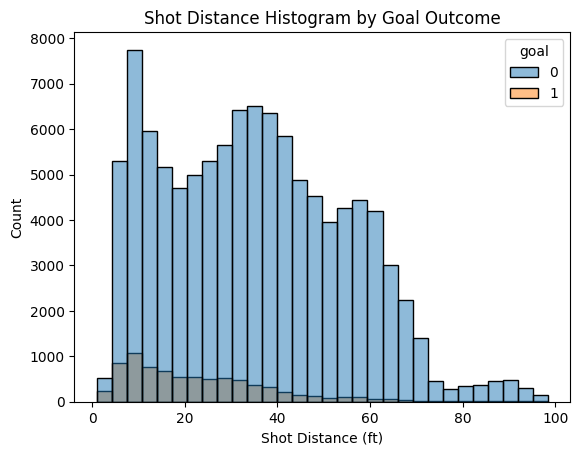

In [74]:
fig = plt.figure()

sns.histplot(
    data = selected_features_shots_df, 
    x = 'shot_distance',
    bins = 30,
    hue = 'goal'
)

plt.title('Shot Distance Histogram by Goal Outcome')
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Count')
plt.show()